# `ExtraTrees` Classifier

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import datasets

sns.set(rc={'figure.figsize':(7.5,5)})

### Create Toy Dataset

`sklearn.datasets.make_moons`: Make two interleaving half circles. A simple toy dataset to visualize clustering and classification algorithms. [More](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html)

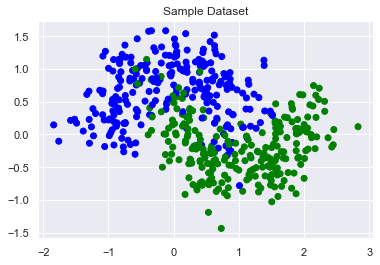

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons

X, y = make_moons(500, noise=0.3, random_state=0x1701a)

plt.scatter(X[:, 0], X[:, 1], cmap = ListedColormap(['blue', 'green']), c=y)
plt.title("Sample Dataset")
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.25, random_state=32
)

Import a function to plot the decision boundary train/test points for extra tree

In [4]:
from modeling_helper import dt_plot_surface, et_plot_surface

Let's start by trying a decision tree with no hyperparameters on the new dataset

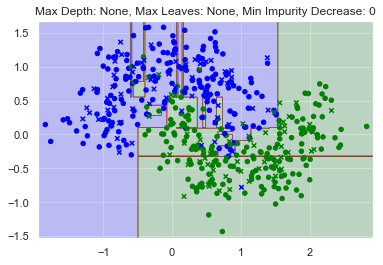

^^^ Train accuracy: 1.0, Test accuracy: 0.86 ^^^


In [5]:
dt_plot_surface(X_train, X_test, y_train, y_test)

## What is happening above?

If we just let decision trees run, they eventually arrive at a place like this with very **low bias**. The model keeps splitting and splitting until it creates boundaries for the edge cases which appear as narrow bands or to continue the tree analogies they are called "tendrils" like ivy sneaking up a tree. How can we prevent this?

How can we prevent it? We want to introduce some randomization to smooth things out. If we don't let those single nodes see all available options, we can solve the problem.

## ExtraTrees

Extra = "Extremely Randomized"

This is an **ensemble** method. Meaning we stack a bunch of trees together. In this case, we restrict the degree that each tree can look at a single node. Rather than try all splits on all variables, we add a new parameter `K` which is the number of splits to try for each tree. We do a bunch of these and average them together. Smooth prediction surfaces come from averaging many extra trees.

**NOTE:** In `sklearn` we don't actually pick `K`. The `sklearn` interface just does **one random split per feature per tree.**

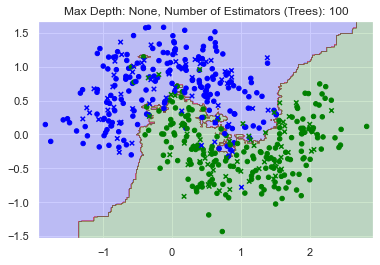

^^^ Train accuracy: 1.0, Test accuracy: 0.87 ^^^


In [6]:
et_plot_surface(X_train, X_test, y_train, y_test)

They both overfit given no hyperparams. If we ensemble a bunch of overfit trees, it's not going to help us generalize. Garbage in, garbage out!

### Hyperparameters

#### Max Depth

This sets the max depth of each tree we're building. The tree grows until we reach the max depth limit. The lower the number, the less decision boundaries you will have.

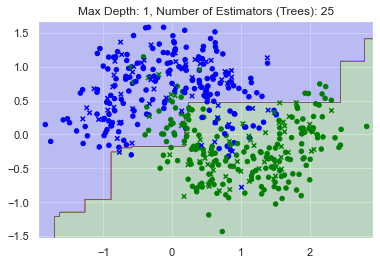

^^^ Train accuracy: 0.83, Test accuracy: 0.85 ^^^


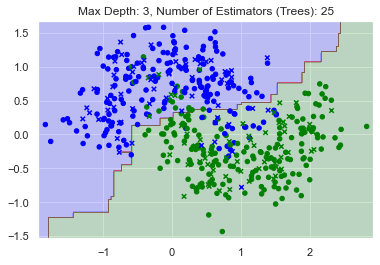

^^^ Train accuracy: 0.89, Test accuracy: 0.87 ^^^


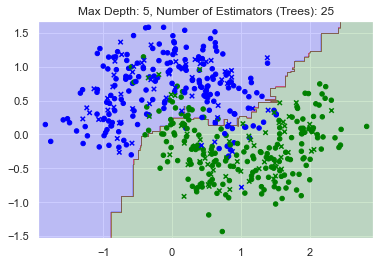

^^^ Train accuracy: 0.88, Test accuracy: 0.9 ^^^


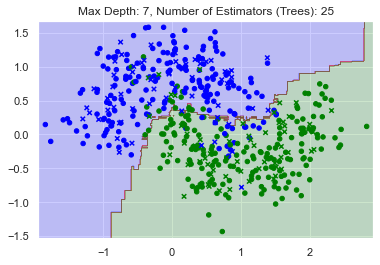

^^^ Train accuracy: 0.91, Test accuracy: 0.9 ^^^


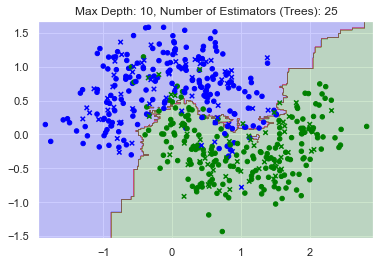

^^^ Train accuracy: 0.97, Test accuracy: 0.89 ^^^


In [7]:
for depth in [1, 3, 5, 7, 10]:
    et_plot_surface(X_train, X_test, y_train, y_test, max_depth=depth, n_estimators=25)

#### N_estimators

How many trees should we build and average?

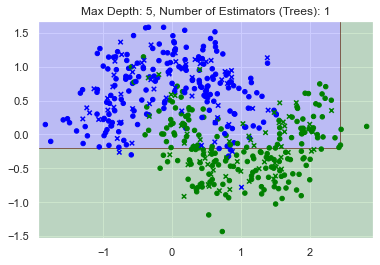

^^^ Train accuracy: 0.75, Test accuracy: 0.73 ^^^


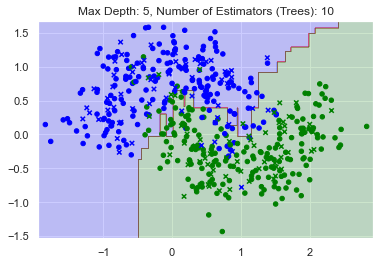

^^^ Train accuracy: 0.9, Test accuracy: 0.86 ^^^


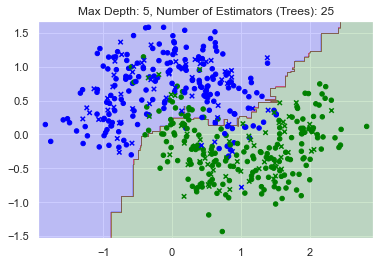

^^^ Train accuracy: 0.88, Test accuracy: 0.9 ^^^


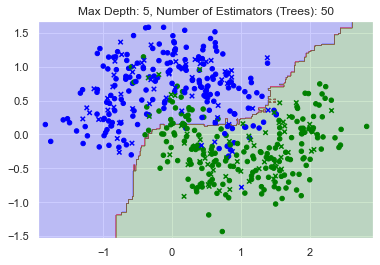

^^^ Train accuracy: 0.88, Test accuracy: 0.9 ^^^


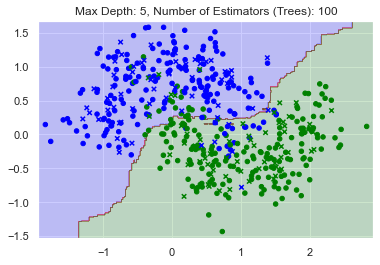

^^^ Train accuracy: 0.89, Test accuracy: 0.9 ^^^


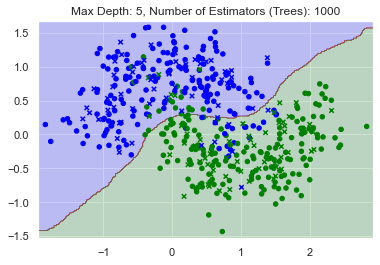

^^^ Train accuracy: 0.9, Test accuracy: 0.89 ^^^


In [8]:
for estimators in [1, 10, 25, 50, 100, 1000]:
    et_plot_surface(X_train, X_test, y_train, y_test, max_depth=5, n_estimators=estimators)